**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
import numpy as np # Linear Algebra
import pandas as pd # Data processing
import seaborn as sns # Data Visualization
from matplotlib import pyplot as plt # Data Visualization
import scipy.stats as stats # Data computing
from scipy.stats import zscore# Data normalization
from sklearn.neighbors import KNeighborsClassifier # import libraries for KNN classification
from sklearn.model_selection import train_test_split # Import train_test_split function

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
Data2C_df = pd.read_csv("2Classdata.csv", sep=',')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
print('\033[1mHead:')
Data2C_df.head()

Head:


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
print('\033[1mTail:')
Data2C_df.tail()

Tail:


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [5]:
print ('\033[1mShape of the data: Rows=', Data2C_df.shape[0] , ', Columns=', Data2C_df.shape[1])

Shape of the data: Rows= 310 , Columns= 7


In [6]:
print ('\033[1mChecking Data type of each attribute and null values if any:')
Data2C_df.info()

Checking Data type of each attribute and null values if any:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


#### Inference:  All features are in numeric data with 310 data points and Label is in object data type. No null values is found in this data

In [7]:
Data2C_df.rename(columns = {'pelvic_tilt numeric':'pelvic_tilt_numeric'}, inplace = True) #remove space in column name
Data2C_df.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt_numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


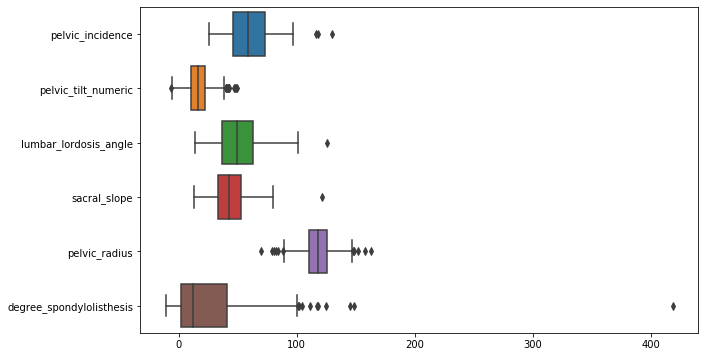

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(data=Data2C_df,orient='h')
plt.show()

#### Inference: From the above boxplot and data description we observe that the attribute 'degree_spondylolisthesis' is highly right skewed than other attributes.

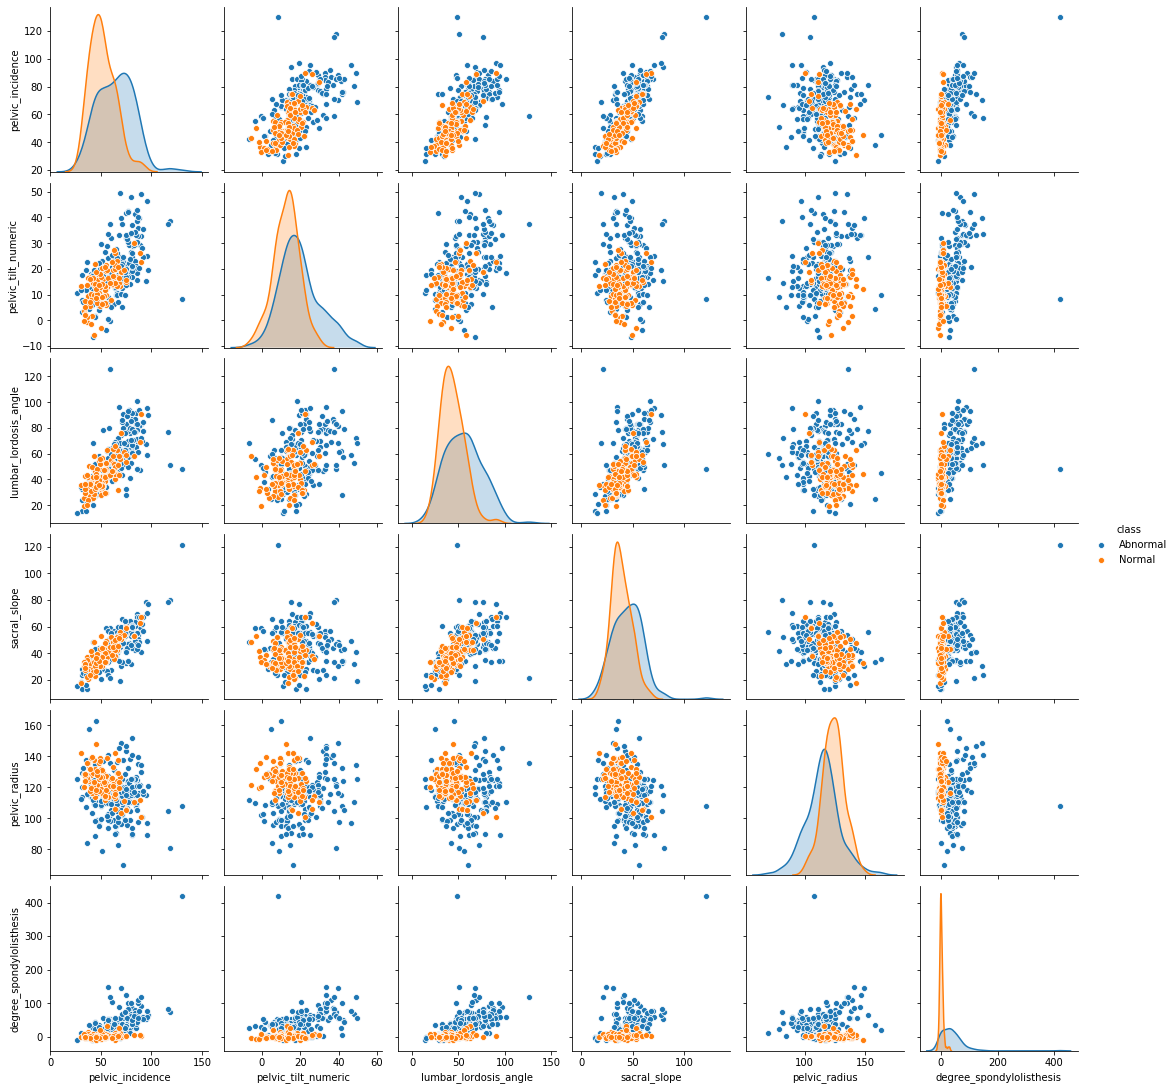

In [10]:
sns.pairplot(Data2C_df,diag_kind = 'kde', hue = 'class') 
# Pair plot for visual interpret relation of the given attributes with the class label
plt.show()

#### Inference: From the above pair plot we observe that the most of the attributes have weak corelation to classify the patiently significantly as normal or abnormal.

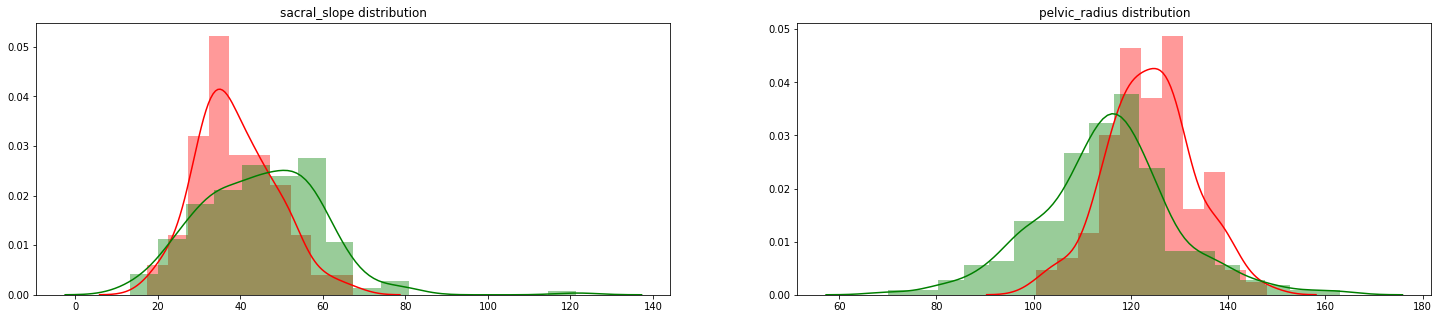

In [9]:
# Distribution of different classes for pelvic_radius and sacral_slope for visualization
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
Normal = np.array(Data2C_df[Data2C_df['class'] == 'Normal']['sacral_slope']) #Selecting sacral_slope corresponding to Normal class
Abnormal = np.array(Data2C_df[Data2C_df['class'] == 'Abnormal']['sacral_slope']) #Selecting sacral_slope corresponding to Abnormal class
sns.distplot(Normal,color = 'red')
sns.distplot(Abnormal, color = 'green')
plt.title('sacral_slope distribution')
plt.subplot(1,2,2)
Normal = np.array(Data2C_df[Data2C_df['class'] == 'Normal']['pelvic_radius']) #Selecting pelvic_radius corresponding to Normal class
Abnormal = np.array(Data2C_df[Data2C_df['class'] == 'Abnormal']['pelvic_radius']) #Selecting pelvic_radius corresponding to Abnormal class
sns.distplot(Normal,color = 'red')
sns.distplot(Abnormal, color = 'green')
plt.title('pelvic_radius distribution')
plt.show()

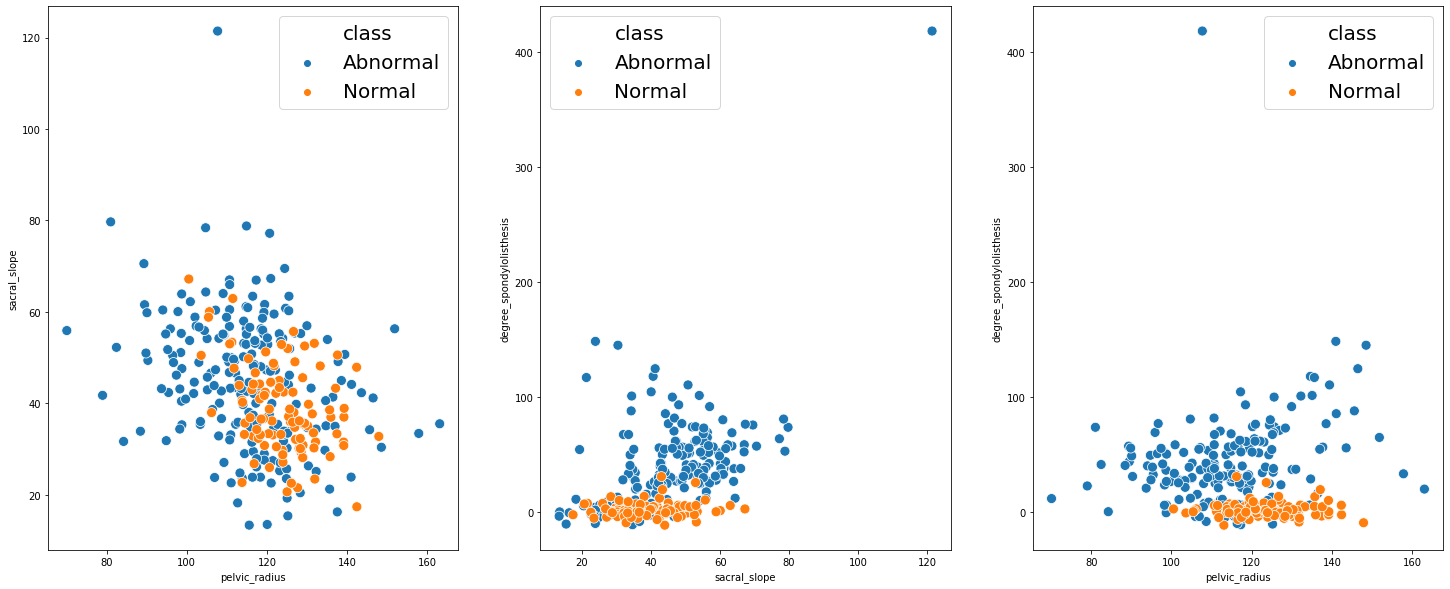

In [23]:
# Scatter plot gives better visualization of above inference about corelation of pelvic_radius, sacral_slope and class
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
sns.scatterplot(x='pelvic_radius',y='sacral_slope',data=Data2C_df,hue='class', s = 100)
plt.legend(prop={'size': 20})
plt.subplot(1,3,2)
sns.scatterplot(x='sacral_slope',y='degree_spondylolisthesis',data=Data2C_df,hue='class',s = 100)
plt.legend(prop={'size': 20})
plt.subplot(1,3,3)
sns.scatterplot(x='pelvic_radius',y='degree_spondylolisthesis',data=Data2C_df,hue='class',s = 100)
plt.legend(prop={'size': 20})
plt.show()

#### Inference: From the above visualization we observe weak correlation between sacral_slope, pelvic_radius with respect to class and does not seem to be a good feature to classify visually.

# Encode the Class variable to integer.

In [26]:
from sklearn.preprocessing import LabelEncoder #data preprocessing to convert class to integer (binary) class
le = LabelEncoder()
import copy
Data2C_df_T = copy.deepcopy(Data2C_df) #new dataset with categorical data to be transformed to numerical data

print('\033[1mCategorical values of class Label: ', *Data2C_df['class'].value_counts().index, 'with count ', *Data2C_df['class'].value_counts())

Data2C_df_T['class'] = le.fit_transform(Data2C_df['class'])
print('Integer values of class Label: ', *Data2C_df_T['class'].value_counts().index, 'with count ', *Data2C_df_T['class'].value_counts())

Categorical values of class Label:  Abnormal Normal with count  210 100
Integer values of class Label:  0 1 with count  210 100


In [27]:
Data2C_df_T.head()

,pelvic_incidence,pelvic_tilt_numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [28]:
Data2C_df_T.tail()

,pelvic_incidence,pelvic_tilt_numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,1


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [29]:
# Create a separate dataframe consisting only of the features i.e independent attributes
Data2C_features = Data2C_df_T.drop(labels= "class" , axis = 1)
Data2C_features.shape

(310, 6)

In [31]:
# Create a separate dataframe consisting labels/class of patients
Data2C_labels = Data2C_df_T["class"]
Data2C_labels.shape

(310,)

#### Inference: we have 6 attributes assuming independent to each other available to classify the patient as normal or abnormal.

# Normalize your Data (X) to get values between 0 to 1.

In [32]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
Data2C_features_z = Data2C_features.apply(zscore)  # convert all attributes to Z scale 

Data2C_features_z.describe()

,pelvic_incidence,pelvic_tilt_numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,-2.141656e-16,1.568638e-16,3.527644e-16,-1.719055e-16,4.548333e-16,9.060852e-17
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01


In [33]:
Data2C_features_z.shape

(310, 6)

In [34]:
# store the normalized features data into np array 
X = np.array(Data2C_features_z)
X.shape

(310, 6)

In [35]:
# store the labels data into a separate np array
y = np.array(Data2C_labels)
y.shape

(310,)

# Split the dat as train and test with a ratio of 70:30.

In [36]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [37]:
print("\033[1mTraining set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 217 samples.
Testing set has 93 samples.


In [38]:
print("T\033[1mraining set has {} labels.".format(y_train.shape[0]))
print("Testing set has {} labels.".format(y_test.shape[0]))

Training set has 217 labels.
Testing set has 93 labels.


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [43]:
KNN_clf = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
# Call Nearest Neighbour algorithm and build KNN model using training dataset.
# Used three nearest neighbor based on distance and classify based on majority class the neighbor belong to. 
KNN_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [45]:
#Predict test labels using the above built model on test datasets
y_test_pred = KNN_clf.predict(X_test)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [46]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print('\033[1mWith KNN (K=3) accuracy on test dataset is: ',KNN_clf.score(X_test,y_test))

With KNN (K=3) accuracy on test dataset is:  0.7741935483870968


#### Inference: We cannot say whether 77% accuracy is good or not at this point. We have to iterate building model with different values of k.

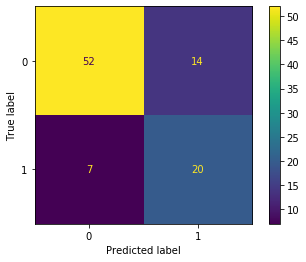

In [183]:
metrics.plot_confusion_matrix(KNN_clf, X_test, y_test)
# Provides in terms of absolute numbers true positive(TP), false negative(FN), false positive(FP) and true negative(TN)

#### Inference: Outcomes: TP = 52, TN = 20 which are correctly predicted and FN = 14, FP = 7 are incorrectly predicted

In [184]:
from sklearn.metrics import classification_report
#Performance report in terms of precision and recall
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        66
           1       0.59      0.74      0.66        27

    accuracy                           0.77        93
   macro avg       0.73      0.76      0.74        93
weighted avg       0.80      0.77      0.78        93



#### Inference: Generally, precision and recall should be high for both class.  Especially such business case like patient classification precision is very much important. For normal case prediction the precision is low as 59%.

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

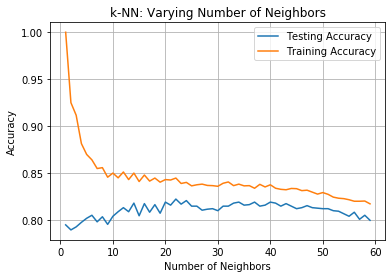

Best accuracy is 0.8225806451612903 with K = 22


In [49]:
neighbors = np.arange(1, 60)
train_accuracy = []
test_accuracy = []
train = []
test = []
# Loop over different values of k from 1 to 60
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20): # for different value of random state
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=j)
        # Note used X, y - normalized dataframe
        knn = KNeighborsClassifier(n_neighbors=k)      
        knn.fit(X_train,y_train)
        train.append(knn.score(X_train,y_train))
        test.append(knn.score(X_test,y_test))
    #Compute accuracy on the training set
    train_accuracy.append(np.mean(train))
    #Compute accuracy on the testing set
    test_accuracy.append(np.mean(test))
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.grid()
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
print('\033[1mBest accuracy is {} with K = {}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [50]:
#Now lets check the performance with k =22
KNN_clf = KNeighborsClassifier(n_neighbors= 22 , weights = 'distance' )
# Call Nearest Neighbour algorithm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)
KNN_clf.fit(X_train, y_train)
y_test_pred = KNN_clf.predict(X_test)

In [53]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        66
           1       0.70      0.70      0.70        27

    accuracy                           0.83        93
   macro avg       0.79      0.79      0.79        93
weighted avg       0.83      0.83      0.83        93



#### Inference: With k=22 we have better precision and recall than earlier with k = 3 to classify well. However, we can improve this basis on domain knowledge. Instead of including all the attributes we should exclude the attributes that is adding only noice and not contributing to predict well. 

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [54]:
Data3C_df = pd.read_csv("3Classdata.csv", sep=',')

In [55]:
Data3C_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [56]:
print ('\033[1mData contains',Data3C_df['class'].nunique() ,'class labels as', *Data3C_df['class'].unique())

Data contains 3 class labels as Hernia Spondylolisthesis Normal


In [57]:
Data3C_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [58]:
Data3C_df.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


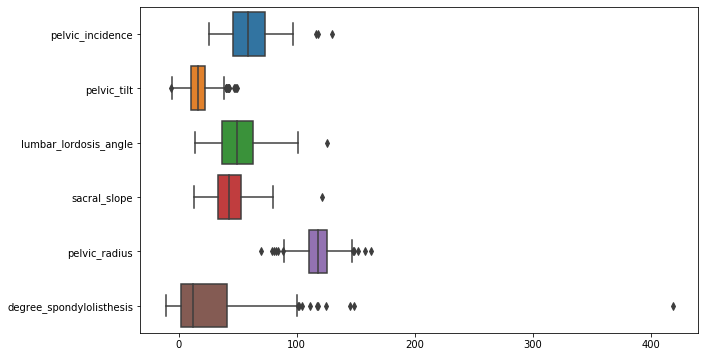

In [59]:
plt.figure(figsize=(10,6))
sns.boxplot(data=Data3C_df,orient='h')
plt.show()

#### Inference: Data seems similiar to earlier data in terms of data characteristics except that it is classified in to three labels

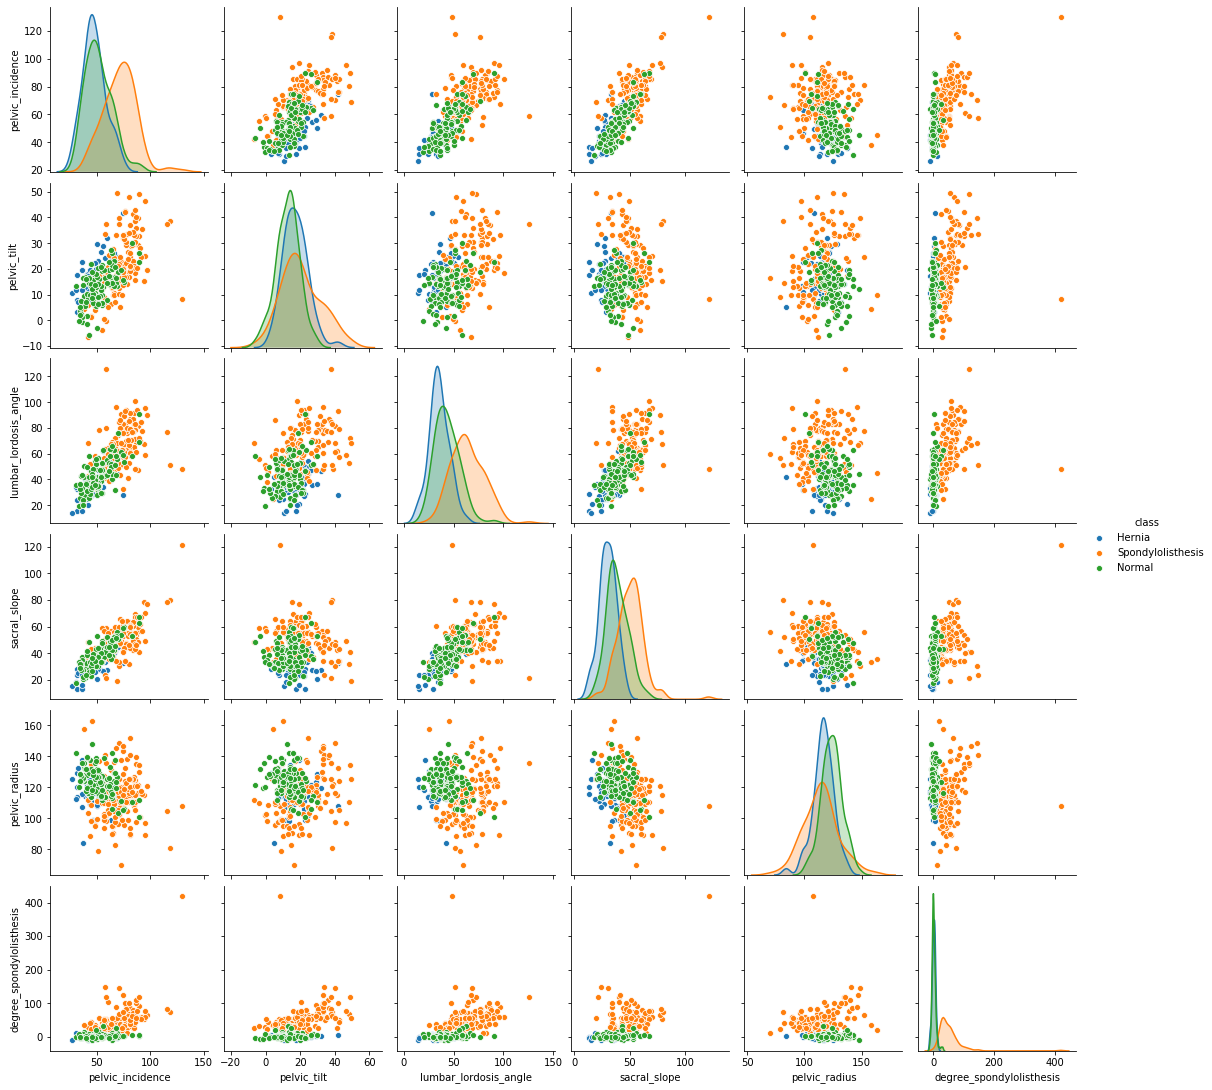

In [60]:
sns.pairplot(Data3C_df,diag_kind = 'kde', hue = 'class') 
# Pair plot for visual interpret relation of the given attributes with the class label
plt.show()

#### Inference: Visualization we see that it is difficult to distinguish between patient class with Hernia and normal class

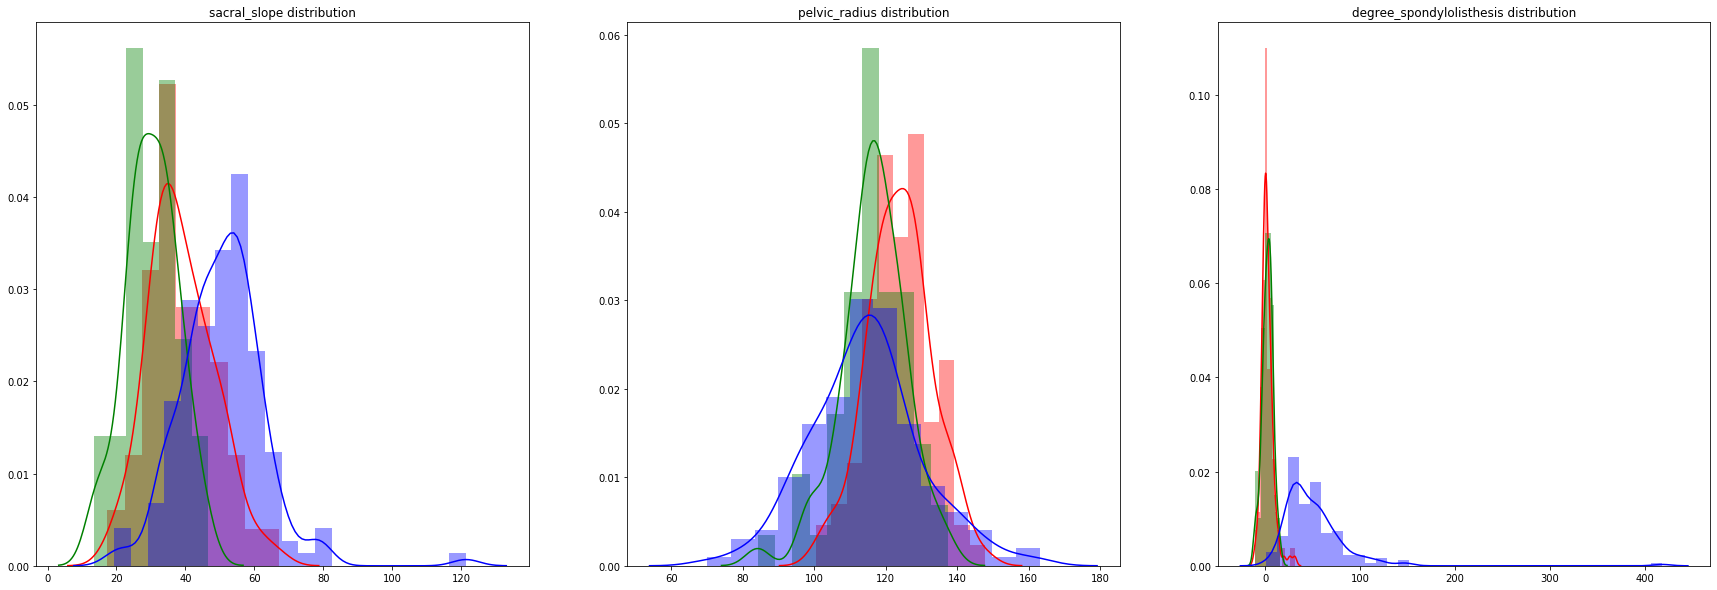

In [61]:
# Distribution of different classes for pelvic_radius and sacral_slope for visualization
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
Normal = np.array(Data3C_df[Data3C_df['class'] == 'Normal']['sacral_slope']) #Selecting sacral_slope corresponding to Normal class
Hernia = np.array(Data3C_df[Data3C_df['class'] == 'Hernia']['sacral_slope']) #Selecting sacral_slope corresponding to Hernia class
Spondylolisthesis = np.array(Data3C_df[Data3C_df['class'] == 'Spondylolisthesis']['sacral_slope']) #Selecting sacral_slope corresponding to Hernia class
sns.distplot(Normal,color = 'red')
sns.distplot(Hernia, color = 'green')
sns.distplot(Spondylolisthesis, color = 'blue')
plt.title('sacral_slope distribution')
plt.subplot(1,3,2)
Normal = np.array(Data3C_df[Data3C_df['class'] == 'Normal']['pelvic_radius']) #Selecting pelvic_radius corresponding to Normal class
Hernia = np.array(Data3C_df[Data3C_df['class'] == 'Hernia']['pelvic_radius']) #Selecting pelvic_radius corresponding to Hernia class
Spondylolisthesis = np.array(Data3C_df[Data3C_df['class'] == 'Spondylolisthesis']['pelvic_radius']) #Selecting pelvic_radius corresponding to Hernia class
sns.distplot(Normal,color = 'red')
sns.distplot(Hernia, color = 'green')
sns.distplot(Spondylolisthesis, color = 'blue')
plt.title('pelvic_radius distribution')
plt.subplot(1,3,3)
Normal = np.array(Data3C_df[Data3C_df['class'] == 'Normal']['degree_spondylolisthesis']) #Selecting degree_spondylolisthesis corresponding to Normal class
Hernia = np.array(Data3C_df[Data3C_df['class'] == 'Hernia']['degree_spondylolisthesis']) #Selecting degree_spondylolisthesis corresponding to Hernia class
Spondylolisthesis = np.array(Data3C_df[Data3C_df['class'] == 'Spondylolisthesis']['degree_spondylolisthesis']) #Selecting degree_spondylolisthesis corresponding to Hernia class
sns.distplot(Normal,color = 'red')
sns.distplot(Hernia, color = 'green')
sns.distplot(Spondylolisthesis, color = 'blue')
plt.title('degree_spondylolisthesis distribution')
plt.show()

In [62]:
#new dataset with class data to be transformed to numerical data
le = LabelEncoder()
import copy
Data3C_df_T = copy.deepcopy(Data3C_df) 
print('\033[1mCategorical values of class Label: ', *Data3C_df['class'].value_counts().index, 'with count ', *Data3C_df['class'].value_counts())
Data3C_df_T['class'] = le.fit_transform(Data3C_df['class']) #transform to numerical data

print('Integer values of class Label: ', *Data3C_df_T['class'].value_counts().index, 'with count ', *Data3C_df_T['class'].value_counts())

Categorical values of class Label:  Spondylolisthesis Normal Hernia with count  150 100 60
Integer values of class Label:  2 1 0 with count  150 100 60


In [63]:
#Creating feature set and target set from the data
Data3C_features = Data3C_df_T.drop(labels= "class" , axis = 1)
print (' Shape of Feature data set', Data3C_features.shape)

Data3C_labels = Data3C_df_T["class"]
print (' Shape of Target  data set',Data3C_labels.shape)

 Shape of Feature data set (310, 6)
 Shape of Target  data set (310,)


In [64]:
#Normalization of data and store in to numpy array to perform mathematical computing
Data3C_features_z = Data3C_features.apply(zscore)
X = np.array(Data3C_features_z)
y = np.array(Data3C_labels)
print (' Shape of Feature data set', X.shape) # To verify the shape is intact
print (' Shape of Target  data set',y.shape)

 Shape of Feature data set (310, 6)
 Shape of Target  data set (310,)


In [65]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print("\033[1mTraining set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("T\033[1mraining set has {} labels.".format(y_train.shape[0]))
print("Testing set has {} labels.".format(y_test.shape[0]))

Training set has 217 samples.
Testing set has 93 samples.
Training set has 217 labels.
Testing set has 93 labels.


In [66]:
# Using KNN classifier to fit the normalized traning set data and predict for test feature data
KNN_clf = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
# Call Nearest Neighbour algorithm
KNN_clf.fit(X_train, y_train)
y_test_pred = KNN_clf.predict(X_test)

In [67]:
#Print performance measure
print('\033[1mWith KNN (K=3) accuracy on test dataset is: ',KNN_clf.score(X_test,y_test))

With KNN (K=3) accuracy on test dataset is:  0.7419354838709677


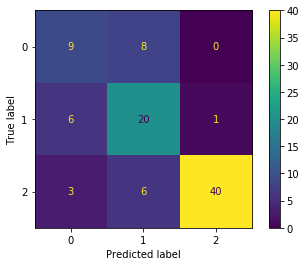

In [68]:
metrics.plot_confusion_matrix(KNN_clf, X_test, y_test)

In [70]:
#Performance report in terms of precision and recall
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.50      0.53      0.51        17
           1       0.59      0.74      0.66        27
           2       0.98      0.82      0.89        49

    accuracy                           0.74        93
   macro avg       0.69      0.70      0.69        93
weighted avg       0.78      0.74      0.75        93



#### Inference: Low precision and recall score to distinguish and predict Normal and Hernia patients.

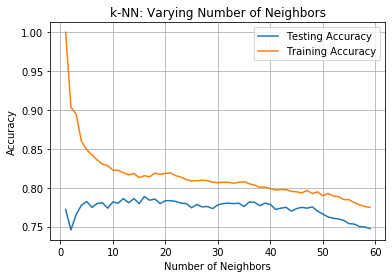

Best accuracy is 0.7887096774193547 with K = 16


In [71]:
## Finding best K value
neighbors = np.arange(1, 60)
train_accuracy = []
test_accuracy = []
train = []
test = []
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20): # for different value of random state
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=j)
        knn = KNeighborsClassifier(n_neighbors=k)      
        knn.fit(X_train,y_train)
        train.append(knn.score(X_train,y_train))
        test.append(knn.score(X_test,y_test))
    #Compute accuracy on the training set
    train_accuracy.append(np.mean(train))
    #Compute accuracy on the testing set
    test_accuracy.append(np.mean(test))
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.grid()
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
print('\033[1mBest accuracy is {} with K = {}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [74]:
KNN_clf = KNeighborsClassifier(n_neighbors= 16 , weights = 'distance' )
# Call Nearest Neighbour algorithm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=3)
KNN_clf.fit(X_train, y_train)
y_test_pred = KNN_clf.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71        18
           1       0.70      0.85      0.77        27
           2       0.95      0.88      0.91        48

    accuracy                           0.83        93
   macro avg       0.80      0.80      0.80        93
weighted avg       0.84      0.83      0.83        93



#### Inference: With K=16 we have better performance in predicting for three patient category classification

## Thank You